
After working with the data from starwars it has become clear, that you can't really do anything exciting with the data since all the valuable data from the characters in the film are API Endpoints, so the data is kind of restricted

In [209]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import matplotlib for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import json_normalize


import json

In [210]:
# Load JSON data from file
with open('data/starwarsData.json') as f:
    data = json.load(f)

# Normalize the 'people' section to create a table of people data
#people_df = json_normalize(data['people'])
people_df = pd.DataFrame(data['people'])

In [211]:
people_df.columns

Index(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color',
       'birth_year', 'gender', 'homeworld', 'films', 'species', 'vehicles',
       'starships', 'created', 'edited', 'url', 'desc'],
      dtype='object')

In [212]:
people_df.head(5)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,desc
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,http://swapi.co/api/planets/1/,"[http://swapi.co/api/films/6/, http://swapi.co...",[http://swapi.co/api/species/1/],"[http://swapi.co/api/vehicles/14/, http://swap...","[http://swapi.co/api/starships/12/, http://swa...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,http://swapi.co/api/people/1/,[Luke Skywalker is a fictional character and t...
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,http://swapi.co/api/planets/1/,"[http://swapi.co/api/films/5/, http://swapi.co...",[http://swapi.co/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,http://swapi.co/api/people/2/,[C-3PO (/siːˈθriːpi.oʊ/) or See-Threepio is a ...
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,http://swapi.co/api/planets/8/,"[http://swapi.co/api/films/5/, http://swapi.co...",[http://swapi.co/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,http://swapi.co/api/people/3/,[R2-D2 is a fictional robot character in the S...
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,http://swapi.co/api/planets/1/,"[http://swapi.co/api/films/6/, http://swapi.co...",[http://swapi.co/api/species/1/],[],[http://swapi.co/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,http://swapi.co/api/people/4/,"[Darth Vader, also known by his birth name Ana..."
4,Leia Organa,150,49,brown,light,brown,19BBY,female,http://swapi.co/api/planets/2/,"[http://swapi.co/api/films/6/, http://swapi.co...",[http://swapi.co/api/species/1/],[http://swapi.co/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,http://swapi.co/api/people/5/,[Princess Leia Organa of Alderaan (also Senato...


In the following code I'm looking to se what my data type are

In [213]:
people_df.dtypes

name          object
height        object
mass          object
hair_color    object
skin_color    object
eye_color     object
birth_year    object
gender        object
homeworld     object
films         object
species       object
vehicles      object
starships     object
created       object
edited        object
url           object
desc          object
dtype: object

Since my data type is object, I will clean it up a bit to make 

In [214]:
people_df['height'] = pd.to_numeric(people_df['height'], errors='coerce')
people_df['mass'] = pd.to_numeric(people_df['mass'], errors='coerce')
people_df['birth_year'] = people_df['birth_year'].str.replace('BBY', '').astype(str)

In [215]:
people_df.dtypes

name           object
height        float64
mass          float64
hair_color     object
skin_color     object
eye_color      object
birth_year     object
gender         object
homeworld      object
films          object
species        object
vehicles       object
starships      object
created        object
edited         object
url            object
desc           object
dtype: object

In [216]:
people_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,desc
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19,male,http://swapi.co/api/planets/1/,"[http://swapi.co/api/films/6/, http://swapi.co...",[http://swapi.co/api/species/1/],"[http://swapi.co/api/vehicles/14/, http://swap...","[http://swapi.co/api/starships/12/, http://swa...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,http://swapi.co/api/people/1/,[Luke Skywalker is a fictional character and t...
1,C-3PO,167.0,75.0,n/a,gold,yellow,112,n/a,http://swapi.co/api/planets/1/,"[http://swapi.co/api/films/5/, http://swapi.co...",[http://swapi.co/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,http://swapi.co/api/people/2/,[C-3PO (/siːˈθriːpi.oʊ/) or See-Threepio is a ...
2,R2-D2,96.0,32.0,n/a,"white, blue",red,33,n/a,http://swapi.co/api/planets/8/,"[http://swapi.co/api/films/5/, http://swapi.co...",[http://swapi.co/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,http://swapi.co/api/people/3/,[R2-D2 is a fictional robot character in the S...
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,http://swapi.co/api/planets/1/,"[http://swapi.co/api/films/6/, http://swapi.co...",[http://swapi.co/api/species/1/],[],[http://swapi.co/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,http://swapi.co/api/people/4/,"[Darth Vader, also known by his birth name Ana..."
4,Leia Organa,150.0,49.0,brown,light,brown,19,female,http://swapi.co/api/planets/2/,"[http://swapi.co/api/films/6/, http://swapi.co...",[http://swapi.co/api/species/1/],[http://swapi.co/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,http://swapi.co/api/people/5/,[Princess Leia Organa of Alderaan (also Senato...


Now since the we have columns that are you url/api endpoint we want to clean it up

In [217]:
columns_to_drop = ['films', 'vehicles', 'starships', 'url', 'created', 'edited', 'species']

people_df.drop(columns=columns_to_drop, inplace=True)


In [218]:
people_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,desc
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19,male,http://swapi.co/api/planets/1/,[Luke Skywalker is a fictional character and t...
1,C-3PO,167.0,75.0,n/a,gold,yellow,112,n/a,http://swapi.co/api/planets/1/,[C-3PO (/siːˈθriːpi.oʊ/) or See-Threepio is a ...
2,R2-D2,96.0,32.0,n/a,"white, blue",red,33,n/a,http://swapi.co/api/planets/8/,[R2-D2 is a fictional robot character in the S...
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,http://swapi.co/api/planets/1/,"[Darth Vader, also known by his birth name Ana..."
4,Leia Organa,150.0,49.0,brown,light,brown,19,female,http://swapi.co/api/planets/2/,[Princess Leia Organa of Alderaan (also Senato...


Now the data looks a little better, but we are missing some values = n/a. 

In [219]:
people_df.isna().sum()

name           0
height         6
mass          29
hair_color     0
skin_color     0
eye_color      0
birth_year     0
gender         0
homeworld      0
desc          54
dtype: int64

The biggest problem is n/a values in height and mass, which I will use imputation to give median values

In [220]:
people_df['height'] = people_df['height'].fillna(people_df['height'].median())
people_df['mass'] = people_df['mass'].fillna(people_df['mass'].median())


Now checking for na values it looks better

In [221]:
people_df.isna().sum()

name           0
height         0
mass           0
hair_color     0
skin_color     0
eye_color      0
birth_year     0
gender         0
homeworld      0
desc          54
dtype: int64

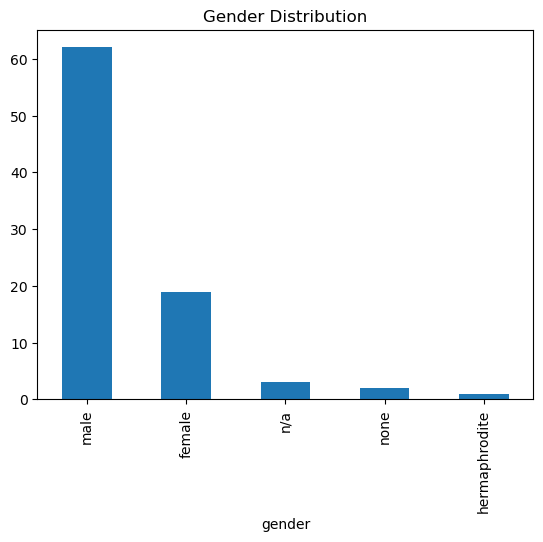

In [222]:
people_df['gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

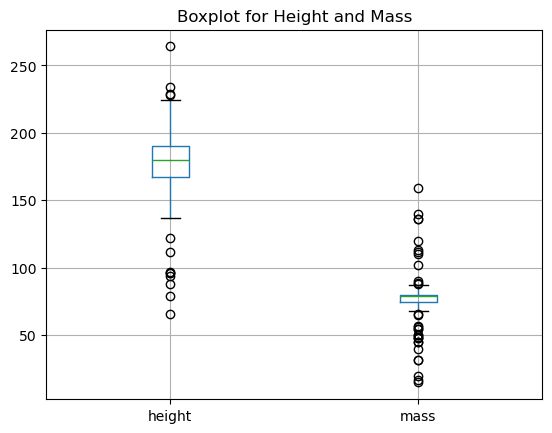

In [223]:
# Detect outliers using boxplot
people_df[['height', 'mass']].boxplot()
plt.title('Boxplot for Height and Mass')
plt.show()


In [224]:
# Calculate average height and mass for each gender
avg_height_by_gender = people_df.groupby('gender')['height'].mean()
avg_mass_by_gender = people_df.groupby('gender')['mass'].mean()

print(avg_height_by_gender)
print(avg_mass_by_gender)


gender
female           167.000000
hermaphrodite    175.000000
male             179.274194
n/a              120.000000
none             190.000000
Name: height, dtype: float64
gender
female            65.852632
hermaphrodite     79.000000
male              80.422581
n/a               46.333333
none             109.500000
Name: mass, dtype: float64


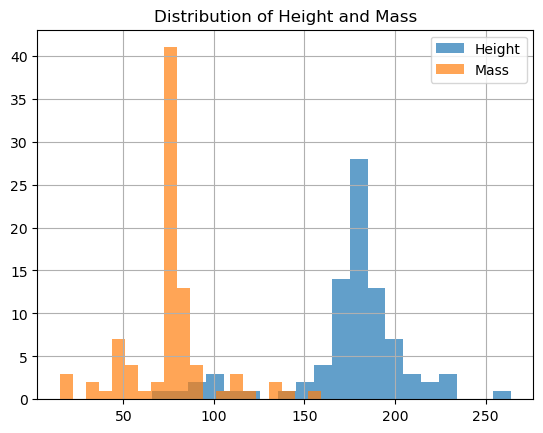

In [225]:
# Visualize the distribution of height and mass
people_df['height'].hist(bins=20, alpha=0.7, label='Height')
people_df['mass'].hist(bins=20, alpha=0.7, label='Mass')
plt.legend()
plt.title('Distribution of Height and Mass')
plt.show()
